In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assuming the data is stored in a CSV file
df = pd.read_csv(r'D:\NeuronetiX\Graduation Project\data.csv')

### Explore the Data

In [3]:
# Display the first few rows of the data
print(df.head(2))

   TransactionID        Date      Time  CustomerID  Age Gender Location  \
0              1  12/24/2020   7:27:59         441   27  Other  City_15   
1              2  11/18/2022  14:36:39         340   43   Male  City_13   

   StoreID  OnlineOrderFlag  ProductID  ...  PaymentType PromotionApplied  \
0      NaN             True        106  ...  Credit Card            False   
1      NaN             True        816  ...  Credit Card             True   

   DiscountAmount  GiftWrap  ShippingMethod DeliveryTime  Weather  Event  \
0             0.0     False        Standard          5.0    Snowy    NaN   
1             0.0      True         Express          3.0    Sunny    NaN   

   CustomerSatisfaction ReturnFlag  
0                     5      False  
1                     2       True  

[2 rows x 25 columns]


In [7]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

In [8]:
# Check for missing values
print(df.isnull().sum())

TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64


In [9]:
# Get basic statistical details
print(df.describe())

       TransactionID   CustomerID           Age      StoreID     ProductID  \
count    10000.00000  10000.00000  10000.000000  4582.000000  10000.000000   
mean      5000.50000    251.93300     43.791700    50.920559    500.234800   
std       2886.89568    145.00392     15.366585    28.864546    288.741317   
min          1.00000      1.00000     18.000000     1.000000      1.000000   
25%       2500.75000    127.00000     30.000000    26.000000    252.000000   
50%       5000.50000    254.00000     44.000000    51.000000    500.000000   
75%       7500.25000    379.00000     57.000000    76.000000    750.000000   
max      10000.00000    500.00000     70.000000   100.000000   1000.000000   

           Quantity     UnitPrice    TotalPrice  DiscountAmount  DeliveryTime  \
count  10000.000000  10000.000000  10000.000000    10000.000000   5418.000000   
mean       3.010600     54.962118    165.426015        6.954545      3.004245   
std        1.404452     26.239370    116.107776       

### Filling missing values

In [10]:
# Fill missing values with mode (most frequent value)

# StoreID mode
store_mode = df['StoreID'].mode()[0]
df['StoreID'].fillna(store_mode, inplace=True)

# ShippingMethod mode
shipping_mode = df['ShippingMethod'].mode()[0]
df['ShippingMethod'].fillna(shipping_mode, inplace=True)

# DeliveryTime mode
delivery_mode = df['DeliveryTime'].mode()[0]
df['DeliveryTime'].fillna(delivery_mode, inplace=True)

# Event mode
event_mode = df['Event'].mode()[0]
df['Event'].fillna(event_mode, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6376\3957992584.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['StoreID'].fillna(store_mode, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6376\3957992584.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [11]:
# Check if any missing values are left
print(df.isnull().sum())

TransactionID           0
Date                    0
Time                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
StoreID                 0
OnlineOrderFlag         0
ProductID               0
ProductName             0
Category                0
Quantity                0
UnitPrice               0
TotalPrice              0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
GiftWrap                0
ShippingMethod          0
DeliveryTime            0
Weather                 0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
dtype: int64


### chaeck outliers

In [12]:
import numpy as np

# Select numeric columns
numeric_columns = ['Age', 'Quantity', 'UnitPrice', 'TotalPrice', 'DiscountAmount', 'DeliveryTime', 'CustomerSatisfaction']

# Function to handle outliers using IQR (Interquartile Range)
def handle_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    median = df[column].median()
    
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])

# Apply the function to handle outliers for each numeric column
for col in numeric_columns:
    handle_outliers_with_median(df, col)

# Check if outliers are handled
print(df.describe())

       TransactionID   CustomerID           Age       StoreID     ProductID  \
count    10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean      5000.50000    251.93300     43.791700     60.174200    500.234800   
std       2886.89568    145.00392     15.366585     21.310422    288.741317   
min          1.00000      1.00000     18.000000      1.000000      1.000000   
25%       2500.75000    127.00000     30.000000     56.000000    252.000000   
50%       5000.50000    254.00000     44.000000     68.000000    500.000000   
75%       7500.25000    379.00000     57.000000     68.000000    750.000000   
max      10000.00000    500.00000     70.000000    100.000000   1000.000000   

           Quantity     UnitPrice    TotalPrice  DiscountAmount  DeliveryTime  \
count  10000.000000  10000.000000  10000.000000    10000.000000  10000.000000   
mean       3.010600     54.962118    164.523353        3.884410      3.918700   
std        1.404452     26.239370    114.9210

In [13]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Transactions per day
daily_transactions = df.groupby(df['Date'].dt.date)['TransactionID'].count()


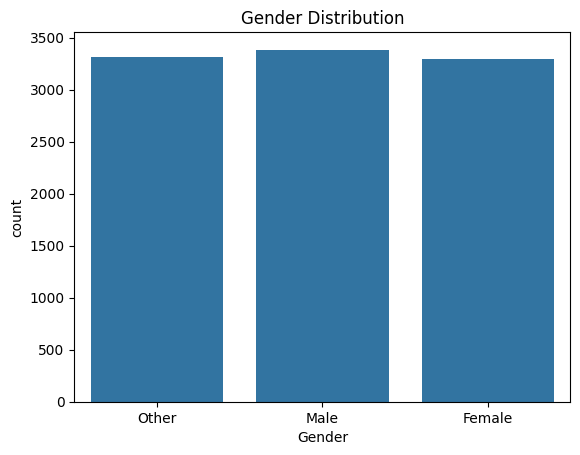

In [14]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()



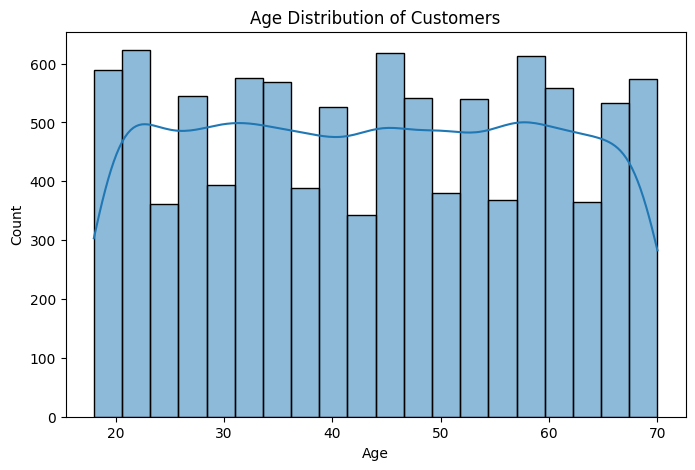

In [15]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.show()

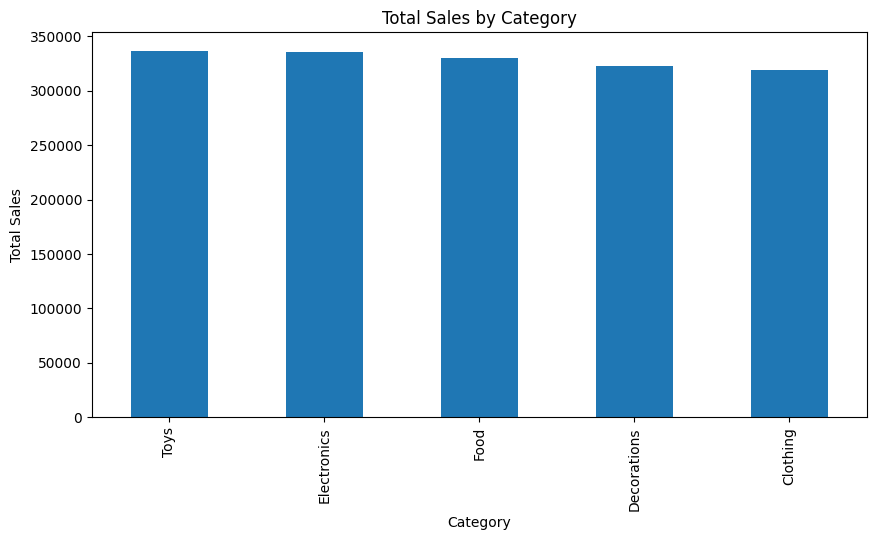

In [16]:
# Total sales by category
category_sales = df.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False)

# Plot total sales by category
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

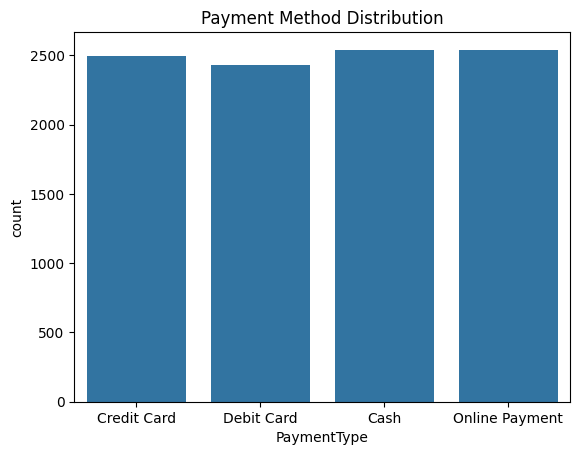

In [17]:
# Payment type distribution
sns.countplot(x='PaymentType', data=df)
plt.title('Payment Method Distribution')
plt.show()

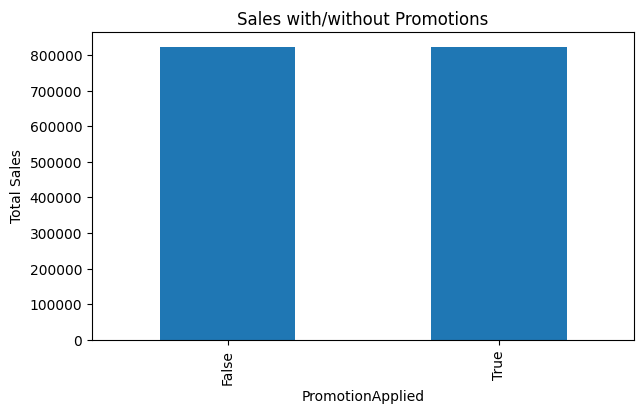

In [18]:
# Total sales when promotion is applied
promotion_sales = df.groupby('PromotionApplied')['TotalPrice'].sum()

# Plot sales with/without promotion
plt.figure(figsize=(7, 4))
promotion_sales.plot(kind='bar')
plt.title('Sales with/without Promotions')
plt.ylabel('Total Sales')
plt.show()

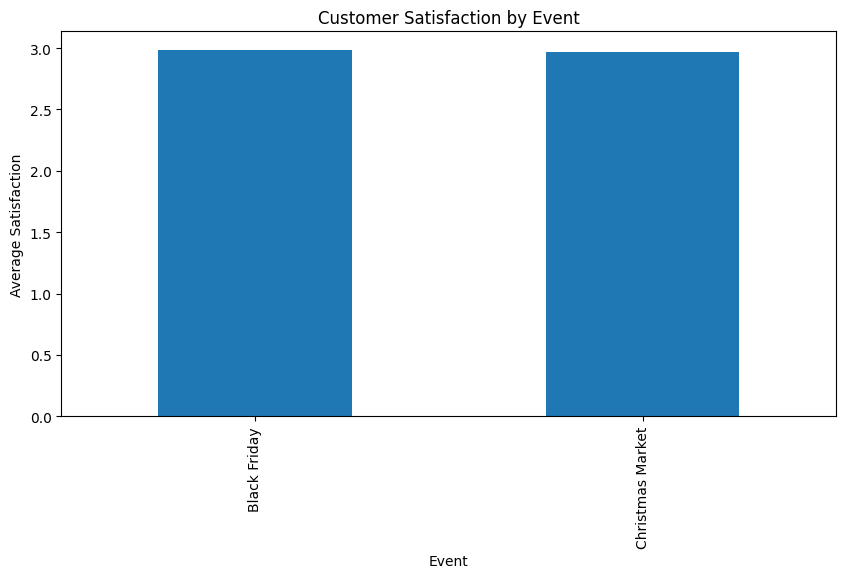

In [19]:
# Satisfaction by Event
event_satisfaction = df.groupby('Event')['CustomerSatisfaction'].mean()

# Plot customer satisfaction by event
plt.figure(figsize=(10, 5))
event_satisfaction.plot(kind='bar')
plt.title('Customer Satisfaction by Event')
plt.ylabel('Average Satisfaction')
plt.show()

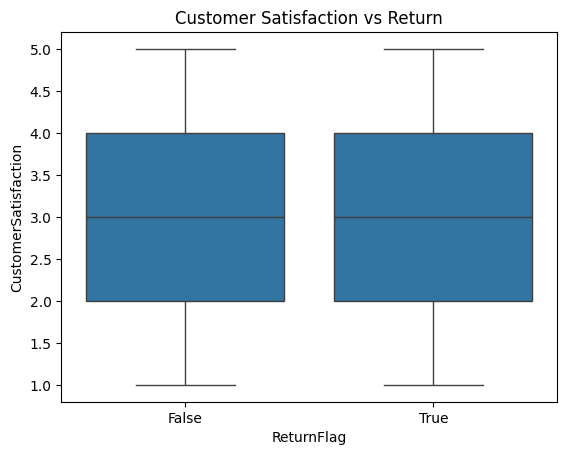

In [20]:
# Satisfaction and returns
sns.boxplot(x='ReturnFlag', y='CustomerSatisfaction', data=df)
plt.title('Customer Satisfaction vs Return')
plt.show()

In [24]:
# Export cleaned data to a new excel
df.to_excel(r'D:\NeuronetiX\Graduation Project\data11.xlsx', index=False)